In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Embedding, LSTM
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist, reuters
from keras.utils import np_utils, to_categorical

%matplotlib inline

In [6]:
text = '짜장면 두개랑 탕수육 작은걸로 갖다주세요'
text_to_word_sequence(text)

['짜장면', '두개랑', '탕수육', '작은걸로', '갖다주세요']

## Bag-of-words

- 단어별로 나누어서 가방에 넣어둔 뒤 얼마나 많은 빈도수로 쓰였는지 확인

In [7]:
docs = [
    '2020년까지 많은 데이터가 구축되었다.',
    '그 중에서 비교적 대부분의 사람들이 접근할 수 있는 오픈 데이터를 정리하였다.',
    '구할 수 있는 모든 데이터를 쏟아 부어서 end to end로 모델을 만들어 보겠다는 포부를 가진 분들의 진입을 쉽게하기 위한 목적이고, 정교한 데이터 구축을 위해서는 이후에 어떠한 데이터가 필요한지를 살펴보기 위한 과정이다.'
]

In [8]:
token = Tokenizer()
token.fit_on_texts(docs)
token.word_counts

OrderedDict([('2020년까지', 1),
             ('많은', 1),
             ('데이터가', 2),
             ('구축되었다', 1),
             ('그', 1),
             ('중에서', 1),
             ('비교적', 1),
             ('대부분의', 1),
             ('사람들이', 1),
             ('접근할', 1),
             ('수', 2),
             ('있는', 2),
             ('오픈', 1),
             ('데이터를', 2),
             ('정리하였다', 1),
             ('구할', 1),
             ('모든', 1),
             ('쏟아', 1),
             ('부어서', 1),
             ('end', 1),
             ('to', 1),
             ('end로', 1),
             ('모델을', 1),
             ('만들어', 1),
             ('보겠다는', 1),
             ('포부를', 1),
             ('가진', 1),
             ('분들의', 1),
             ('진입을', 1),
             ('쉽게하기', 1),
             ('위한', 2),
             ('목적이고', 1),
             ('정교한', 1),
             ('데이터', 1),
             ('구축을', 1),
             ('위해서는', 1),
             ('이후에', 1),
             ('어떠한', 1),
             ('필요한지를', 1),
             ('살펴보기

In [9]:
token.document_count

3

document_count 는 총 몇 개의 문장인지

In [10]:
token.word_docs

defaultdict(int,
            {'데이터가': 2,
             '많은': 1,
             '2020년까지': 1,
             '구축되었다': 1,
             '대부분의': 1,
             '중에서': 1,
             '오픈': 1,
             '사람들이': 1,
             '데이터를': 2,
             '접근할': 1,
             '있는': 2,
             '정리하였다': 1,
             '그': 1,
             '비교적': 1,
             '수': 2,
             '데이터': 1,
             '가진': 1,
             'end로': 1,
             '보겠다는': 1,
             '모델을': 1,
             '포부를': 1,
             '분들의': 1,
             '위한': 1,
             '필요한지를': 1,
             '정교한': 1,
             '만들어': 1,
             '살펴보기': 1,
             '진입을': 1,
             '이후에': 1,
             '위해서는': 1,
             '구할': 1,
             '구축을': 1,
             '목적이고': 1,
             'end': 1,
             '모든': 1,
             '쉽게하기': 1,
             '과정이다': 1,
             '쏟아': 1,
             'to': 1,
             '부어서': 1,
             '어떠한': 1})

각 단어들이 몇 개의 문장에서 나오는지

In [11]:
docs = [
    '2020년까지 많은 데이터가 구축되었다. 그 중에서 비교적 대부분의 사람들이 접근할 수 있는 오픈 데이터를 정리하였다. 구할 수 있는 모든 데이터를 쏟아 부어서 end to end로 모델을 만들어 보겠다는 포부를 가진 분들의 진입을 쉽게하기 위한 목적이고, 정교한 데이터 구축을 위해서는 이후에 어떠한 데이터가 필요한지를 살펴보기 위한 과정이다.'
]

In [12]:
token = Tokenizer()
token.fit_on_texts(docs)
token.word_counts

OrderedDict([('2020년까지', 1),
             ('많은', 1),
             ('데이터가', 2),
             ('구축되었다', 1),
             ('그', 1),
             ('중에서', 1),
             ('비교적', 1),
             ('대부분의', 1),
             ('사람들이', 1),
             ('접근할', 1),
             ('수', 2),
             ('있는', 2),
             ('오픈', 1),
             ('데이터를', 2),
             ('정리하였다', 1),
             ('구할', 1),
             ('모든', 1),
             ('쏟아', 1),
             ('부어서', 1),
             ('end', 1),
             ('to', 1),
             ('end로', 1),
             ('모델을', 1),
             ('만들어', 1),
             ('보겠다는', 1),
             ('포부를', 1),
             ('가진', 1),
             ('분들의', 1),
             ('진입을', 1),
             ('쉽게하기', 1),
             ('위한', 2),
             ('목적이고', 1),
             ('정교한', 1),
             ('데이터', 1),
             ('구축을', 1),
             ('위해서는', 1),
             ('이후에', 1),
             ('어떠한', 1),
             ('필요한지를', 1),
             ('살펴보기

In [13]:
token.document_count

1

In [14]:
token.word_docs

defaultdict(int,
            {'데이터': 1,
             '중에서': 1,
             '구축되었다': 1,
             'end로': 1,
             '보겠다는': 1,
             '가진': 1,
             '있는': 1,
             '모델을': 1,
             '수': 1,
             '포부를': 1,
             '분들의': 1,
             '위한': 1,
             '필요한지를': 1,
             '정교한': 1,
             '정리하였다': 1,
             '만들어': 1,
             '데이터를': 1,
             '살펴보기': 1,
             '진입을': 1,
             '이후에': 1,
             '위해서는': 1,
             '대부분의': 1,
             '많은': 1,
             '2020년까지': 1,
             '구할': 1,
             '구축을': 1,
             '접근할': 1,
             '목적이고': 1,
             '그': 1,
             '비교적': 1,
             'end': 1,
             '오픈': 1,
             '모든': 1,
             '사람들이': 1,
             '쉽게하기': 1,
             '과정이다': 1,
             '쏟아': 1,
             'to': 1,
             '데이터가': 1,
             '부어서': 1,
             '어떠한': 1})

문자열을 일부러 합쳐서 하나의 문자열로 바꾸었지만 . 로 문장 끝은 알려준 상태

하지만 각 문자열 갯수를 문장으로 인식하는 것으로 보임

In [15]:
token.word_index

{'데이터가': 1,
 '수': 2,
 '있는': 3,
 '데이터를': 4,
 '위한': 5,
 '2020년까지': 6,
 '많은': 7,
 '구축되었다': 8,
 '그': 9,
 '중에서': 10,
 '비교적': 11,
 '대부분의': 12,
 '사람들이': 13,
 '접근할': 14,
 '오픈': 15,
 '정리하였다': 16,
 '구할': 17,
 '모든': 18,
 '쏟아': 19,
 '부어서': 20,
 'end': 21,
 'to': 22,
 'end로': 23,
 '모델을': 24,
 '만들어': 25,
 '보겠다는': 26,
 '포부를': 27,
 '가진': 28,
 '분들의': 29,
 '진입을': 30,
 '쉽게하기': 31,
 '목적이고': 32,
 '정교한': 33,
 '데이터': 34,
 '구축을': 35,
 '위해서는': 36,
 '이후에': 37,
 '어떠한': 38,
 '필요한지를': 39,
 '살펴보기': 40,
 '과정이다': 41}

해당 데이터가 존재하는 순서 인덱스

## Word one-hot-coding

In [16]:
text = '짜장면 두개랑 탕수육 작은걸로 갖다주세요'
text_to_word_sequence(text)

['짜장면', '두개랑', '탕수육', '작은걸로', '갖다주세요']

In [20]:
token = Tokenizer()
token.fit_on_texts([text])
token.word_index

{'짜장면': 1, '두개랑': 2, '탕수육': 3, '작은걸로': 4, '갖다주세요': 5}

In [21]:
token.texts_to_sequences([text])

[[1, 2, 3, 4, 5]]

In [23]:
word_size = len(token.word_index) + 1 # 배열이 0부터 시작하니 일부러 1번지 부터 시작하기 위해 사이즈를 늘림
to_categorical(token.texts_to_sequences([text]), num_classes=word_size)

array([[[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]], dtype=float32)

## Word embedding

- 위와 같이 단어들을 one-hot-coding 하면 벡터 길이가 n 개로 너무 길어짐
- n 길이의 벡터를 정해진 사이즈로 줄임
- 어떤 단어가 다른 단어와 유사하다 라는 정보를 이용해 벡터 값을 고려한 one-hot-coding

ex)

행복함 은 좋음 이란 단어와 가깝지만 나쁨 단어와는 거리가 있다 이런 정보

Dense Representation 밀집 표현이라고도 부름

```
[0., 0., 0., 0., 0., 1.]
```

위가 희소 표현 방식이라면

```
[0.24, 0.113, 0.2541, 0.2566]
```

위가 밀집 표현 예

### Word2Vec

<img width="715" alt="스크린샷 2021-12-02 오후 4 23 15" src="https://user-images.githubusercontent.com/16532326/144376426-ba1fa8ec-14c9-4d1d-af50-e24b6e09f174.png">


[데모](http://w.elnn.kr/search/) 사이트에 내용을 보면 

입력 데이터 벡터의 유사도를 이용하여 결과를 만들어 낼 수 있는 걸 알 수 있음

- 단어의 의미를 벡터로 나타내는게 분산 표현
- 단어의 유사도를 벡터로 나타내는게 워드 임베딩
- 이를 저차원의 벡터로 변환한게  밀집 벡터

### 분산 표현(Distributed Representation)

분포 가설을 이용

```
비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다
```

저차원의 벡터에 여러차원에 걸쳐 단어의 의미를 분산 시킴

### CBOW(Continuous Bag of Words)

_현재 포인팅하고 있는 위치의 주변에 있는 단어들을 이용하여 현재 포인팅하는 위치의 단어를 예측_

ex)

This is my dog

This <span style="color:blue"> **is** </span> <span style="color:red"> **??** </span> <span style="color:blue"> **dog** </span>

위 경우 처럼 `??` 라는 단어 주변에 있는 `is`, `dog` 를 이용하여 `??` 를 예측하는것

용어로 예측할 가운데 단어를 center word, 주변 단어를 context word 라고 부름

context word 의 길이를 window 라고 부르며 위의 경우 1

![asdf](https://wikidocs.net/images/page/22660/%EB%8B%A8%EC%96%B4.PNG)

위 그림을 보면 중심 단어를 계속 이동시키며 학습을 하는데 이를 슬라이딩 윈도우 라고 함

학습은 주변단어를 입력, 중심단어를 출력으로 지정하게 됨

따라서 중심 단어를 잘 예측하려면 중심 단어 one-hot-vector 필요

`CBOW` 는 레이어가 하나인 얕은 신경망 구조와 활성함수가 없는 룩업 테이블 구조이기 때문에 프로젝션 레이어라고도 부름

![asdf](https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG)

Matrix: 5, Word vector: 7 (The, fat, cat, sat, on, the, mat)

W 행렬은 기본 랜덤 값으로 정해져 있음

여기다 x 값으로 cat 이 들어온다면

```
[0, 0, 1, 0, 0, 0, 0]
```

값이 채워진 걸과 W 행렬이 곱해질 것 이고, 사실상 결과 값으로 나올 V (cat) 값은 

W 행렬의 x 값이 있었던 행의 값만 나오게 됨

위 작업이 룩업 테이블 작업이고 이 데이터가 사실상 M 차원의 임베딩 데이터

![asdf](https://wikidocs.net/images/page/22660/word2vec_renew_4.PNG)

전 작업을 만약 윈도우 사이즈가 2 == n 라면 2 * n 번 각각 진행 하고,

그의 벡터 평균을 계산함

![asdf](https://wikidocs.net/images/page/22660/word2vec_renew_5.PNG)

전 결과로 벡터 평균 v 를 이용하여

출력 층에도 있는 W' 에 값을 곱함

그럼 다음 softmax 를 이용해 해당 벡터가 어느 위치에 있을 확률이 높은지를 계산함

그럼다음 실제 y 값과 유사하게 만들기 위해 손실 항수로 cross-entropy 를 사용함 

![asdf](https://wikidocs.net/images/page/22660/crossentrophy.PNG)

쉽게 말해 -log 함수를 사용하여 모양이 대략

<img width="238" alt="스크린샷 2021-12-02 오후 5 36 50" src="https://user-images.githubusercontent.com/16532326/144386627-43c16337-05d7-4add-a1e0-775fc1340ab9.png">

위와 같이 생기며, 출력 층의 one-hot-coding 된 y 벡터의 값이 있고, softmax(W' x v) 결과 간의 오차가 작아지게

만들기 위해 역전파를 사용하여 수정을 해감

## 임베딩 사용 방법은?

```
Embedding(16, 4, input_length=2)
```

16개의 단어가 입력으로 들어오지만 벡터 크기는 4로 고정하고, 입력은 매번 단어 2개씩만 들어간다 라는 뜻

## 긍/부정 판별

[테스트 데이터](https://movie.naver.com/movie/bi/mi/point.naver?code=10016)

In [25]:
docs = [
    '크리스마스 최고의 영화',
    '봐도봐도 질리지 않네',
    '내인생 최고의 영화~!!',
    '역사상 최고의 크리스마스 영화. 영화음악이 명곡이다.',
    '언제 봐도 재미가 있는 영화여서 많이본다',
    '유치찬란 허무맹랑 어의상실',
    '으엑 이게뭐얔 무슨영화야 ㅋ',
    '별로... 별로...',
    '명절날 지겹게 봐서 1점',
    '재미있어도 이제 그만 보고 싶음.. 너무 질려서'
]

In [28]:
_class = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [32]:
token = Tokenizer()
token.fit_on_texts(docs)
token.word_index, token.word_counts

({'최고의': 1,
  '영화': 2,
  '크리스마스': 3,
  '별로': 4,
  '봐도봐도': 5,
  '질리지': 6,
  '않네': 7,
  '내인생': 8,
  '역사상': 9,
  '영화음악이': 10,
  '명곡이다': 11,
  '언제': 12,
  '봐도': 13,
  '재미가': 14,
  '있는': 15,
  '영화여서': 16,
  '많이본다': 17,
  '유치찬란': 18,
  '허무맹랑': 19,
  '어의상실': 20,
  '으엑': 21,
  '이게뭐얔': 22,
  '무슨영화야': 23,
  'ㅋ': 24,
  '명절날': 25,
  '지겹게': 26,
  '봐서': 27,
  '1점': 28,
  '재미있어도': 29,
  '이제': 30,
  '그만': 31,
  '보고': 32,
  '싶음': 33,
  '너무': 34,
  '질려서': 35},
 OrderedDict([('크리스마스', 2),
              ('최고의', 3),
              ('영화', 3),
              ('봐도봐도', 1),
              ('질리지', 1),
              ('않네', 1),
              ('내인생', 1),
              ('역사상', 1),
              ('영화음악이', 1),
              ('명곡이다', 1),
              ('언제', 1),
              ('봐도', 1),
              ('재미가', 1),
              ('있는', 1),
              ('영화여서', 1),
              ('많이본다', 1),
              ('유치찬란', 1),
              ('허무맹랑', 1),
              ('어의상실', 1),
              ('으엑', 1),
              ('이게뭐얔', 1),
 

In [31]:
x = token.texts_to_sequences(docs)
x

[[3, 1, 2],
 [5, 6, 7],
 [8, 1, 2],
 [9, 1, 3, 2, 10, 11],
 [12, 13, 14, 15, 16, 17],
 [18, 19, 20],
 [21, 22, 23, 24],
 [4, 4],
 [25, 26, 27, 28],
 [29, 30, 31, 32, 33, 34, 35]]

위 벡터들의 길이가 서로 다 다르니 맞쳐주기 위해 패딩 기법사용하여

길이들을 다 통일 시킴

정해진 길이보다 길면 잘라냄

In [35]:
padded_x = pad_sequences(x, 4)
padded_x

array([[ 0,  3,  1,  2],
       [ 0,  5,  6,  7],
       [ 0,  8,  1,  2],
       [ 3,  2, 10, 11],
       [14, 15, 16, 17],
       [ 0, 18, 19, 20],
       [21, 22, 23, 24],
       [ 0,  0,  4,  4],
       [25, 26, 27, 28],
       [32, 33, 34, 35]], dtype=int32)

In [36]:
word_size = len(token.word_index) + 1

In [37]:
Embedding(word_size, 8, input_length=4)

4개의 패딩을 만들었으므로 input_length = 4,

임의로 8길이의 벡터를 출력으로 지정,

word_size 는 총 입력 단어의 수

In [47]:
model = Sequential()

In [48]:
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              288       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(padded_x, _class, epochs=20)

Train on 10 samples
Epoch 1/20
10/10 [==============================] - 1s 60ms/sample - loss: 0.6910 - accuracy: 0.6000
Epoch 2/20
10/10 [==============================] - 0s 320us/sample - loss: 0.6885 - accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 0s 373us/sample - loss: 0.6860 - accuracy: 0.6000
Epoch 4/20
10/10 [==============================] - 0s 310us/sample - loss: 0.6834 - accuracy: 0.6000
Epoch 5/20
10/10 [==============================] - 0s 275us/sample - loss: 0.6809 - accuracy: 0.6000
Epoch 6/20
10/10 [==============================] - 0s 252us/sample - loss: 0.6784 - accuracy: 0.7000
Epoch 7/20
10/10 [==============================] - 0s 305us/sample - loss: 0.6758 - accuracy: 0.8000
Epoch 8/20
10/10 [==============================] - 0s 346us/sample - loss: 0.6733 - accuracy: 0.8000
Epoch 9/20
10/10 [==============================] - 0s 330us/sample - loss: 0.6708 - accuracy: 0.9000
Epoch 10/20
10/10 [==============================] - 0s 362us/s

In [50]:
model.evaluate(padded_x, _class)[1]

10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 7ms/sample - loss: 0.6396 - accuracy: 1.0000


1.0

# RNN

_순환 신경망_

순서데로 입력된 내용을 잠시 기억하여 나중에 얼마나 중요한 데이터인지 가중치를 줌

같은 층에서 연산이 이루어져 순환이 되어지는 것처럼 보여 순환 신경망이라 부름

이를 이용하여 `내일 날씨가 어때` 라는 문장에도 그냥 날씨 정보를 알려주는 것이 아닌 내일의 날씨를 알려주는 

처리가 가능해짐

# LSTM

_Long Short Term Memory_

`RNN` 에서 순환되어지는 데이터가 많아지게되면 기울기 연산이 많아지는 문제가 발생하여

기억된 내용을 넘길지 버릴지를 판단하는 과정이 추가됨

In [52]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 1s 1us/step


In [56]:
category = np.max(Y_train) + 1
category, len(X_train), len(X_test), X_train[0], len(X_train[0])

(46,
 8982,
 2246,
 [1,
  2,
  2,
  8,
  43,
  10,
  447,
  5,
  25,
  207,
  270,
  5,
  2,
  111,
  16,
  369,
  186,
  90,
  67,
  7,
  89,
  5,
  19,
  102,
  6,
  19,
  124,
  15,
  90,
  67,
  84,
  22,
  482,
  26,
  7,
  48,
  4,
  49,
  8,
  864,
  39,
  209,
  154,
  6,
  151,
  6,
  83,
  11,
  15,
  22,
  155,
  11,
  15,
  7,
  48,
  9,
  2,
  2,
  504,
  6,
  258,
  6,
  272,
  11,
  15,
  22,
  134,
  44,
  11,
  15,
  16,
  8,
  197,
  2,
  90,
  67,
  52,
  29,
  209,
  30,
  32,
  132,
  6,
  109,
  15,
  17,
  12],
 87)

```X_train[0]```

의 경우, 단어 출현 빈도수에 따라 인덱스 번호가 매겨져 변환된 데이터로 이루어진 문장임

즉, 전처리가 이미 일부 진행된 데이터

이 중, 잘 사용되어지지 않는 데이터가 있을 수 있음

그 경우 순위권에서 많이 밀려난 값을 가질텐데 그 threshold 값으로 ```num_word=1000``` 값을 주었으며,

따라서 1000 순위 까지의 단어만 나오게 될 것

In [55]:
x_train = pad_sequences(X_train, maxlen=100)
x_test = pad_sequences(X_test, maxlen=100)

x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   2,   2,   8,  43,  10, 447,   5,  25, 207, 270,   5,   2,
       111,  16, 369, 186,  90,  67,   7,  89,   5,  19, 102,   6,  19,
       124,  15,  90,  67,  84,  22, 482,  26,   7,  48,   4,  49,   8,
       864,  39, 209, 154,   6, 151,   6,  83,  11,  15,  22, 155,  11,
        15,   7,  48,   9,   2,   2, 504,   6, 258,   6, 272,  11,  15,
        22, 134,  44,  11,  15,  16,   8, 197,   2,  90,  67,  52,  29,
       209,  30,  32, 132,   6, 109,  15,  17,  12], dtype=int32)

각 데이터 별로 길이값이 다르므로 맞추어 주기 위해 ```pad_sequences maxlen=100``` 으로 패딩하여 길이 맞춰줌

In [58]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

Y_train[0], y_train[0]

(3,
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

`one-hot encoding` 으로 카테고리 값 전처리

In [60]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


`tanh` 는 `sigmoid` 의 0 ~ 1 보다 범위가 큰 S 자 형태의 -1 ~ 1 범위를 가짐

`sigomid` 는 미분하면 값이 0 ~ 0.25 까지의 값을 가지기 때문에 여러 층을 가지는 

머신러닝 구조에선 값이 0으로 수렴하는 문제가 생길 수 있기 때문에 얕은 머신러닝일때 쓰고

보다 깊은 머신러닝일땐 미분하여도 0 ~ 1 까지 값을 가지는 `tanh` 가 유리

하지만 둘다 Gradient Vanishing 문제가 있음

# Gradient Vanishing

1미만의 값을 곱하기 연산을 할 수록 결국 0에 가깝게 수렴하게됨

위 머신러닝에서도 미분을 하게되어지면 x 가 0에 가까워야 1에 가까운 값을 가지게 되지만

결국 여러번 연산을 거치게 되면 0에 가까워 질 것이란 것

반대의 문제로 기울기 값이 너무 커지면 너무 큰 값을 가지게 되는 문제로 `Gradient Exploding` 가 있음

```Embedding``` 학습에서 사용될 단어 갯수, 각 데이터당 사용된 단어 최대 길이

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 16s 2ms/sample - loss: 2.5627 - accuracy: 0.3712 - val_loss: 2.1419 - val_accuracy: 0.4880
Epoch 2/20
8982/8982 [==============================] - 14s 2ms/sample - loss: 2.0581 - accuracy: 0.4931 - val_loss: 2.0546 - val_accuracy: 0.4978
Epoch 3/20
8982/8982 [==============================] - 14s 2ms/sample - loss: 2.0016 - accuracy: 0.5077 - val_loss: 1.9960 - val_accuracy: 0.5134
Epoch 4/20
8982/8982 [==============================] - 14s 2ms/sample - loss: 1.9177 - accuracy: 0.5257 - val_loss: 1.9478 - val_accuracy: 0.5307
Epoch 5/20
8982/8982 [==============================] - 13s 1ms/sample - loss: 1.7971 - accuracy: 0.5618 - val_loss: 1.7588 - val_accuracy: 0.5766
Epoch 6/20
8982/8982 [==============================] - 14s 2ms/sample - loss: 1.5813 - accuracy: 0.6103 - val_loss: 1.5956 - val_accuracy: 0.5922
Epoch 7/20
8982/8982 [==============================] - 14s 2ms/sample

In [63]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [64]:
x_len = np.arange(len(y_loss))

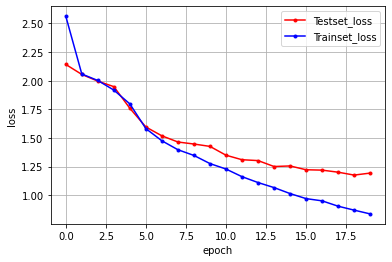

In [65]:
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()